In [11]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(4600, 5300, 25)
p = Page(ticker=Ticker.CAC5PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=11-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)


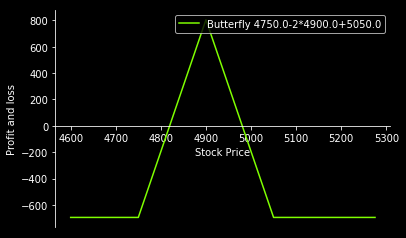

Cost-Butterfly : 695.00€


Category,strike,direction,Quantity,Cost,Premium
Call,4750,long,1,2058,205.8
Call,4900,short,2,-1448,-72.4
Call,5050,long,1,85,8.5


In [17]:
butterfly = Butterfly(call[4750], call[4900], call[5050])
g.profit_strategy(butterfly)
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
g.display_summary(butterfly)

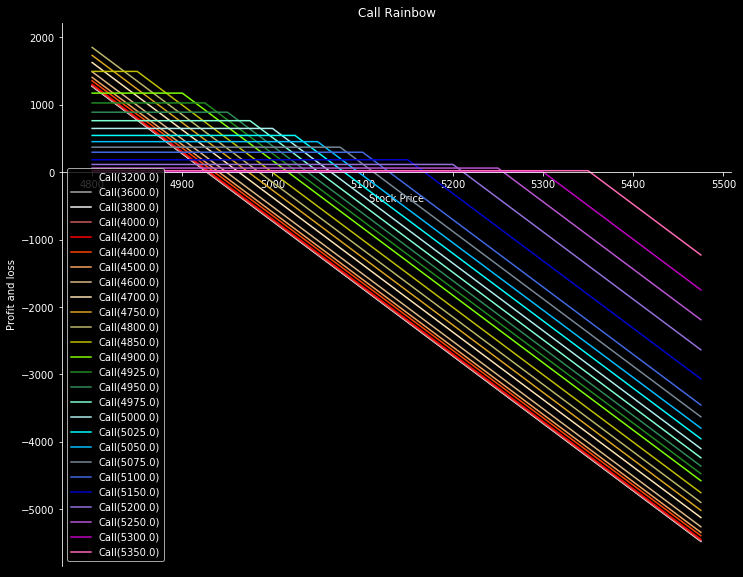

In [5]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

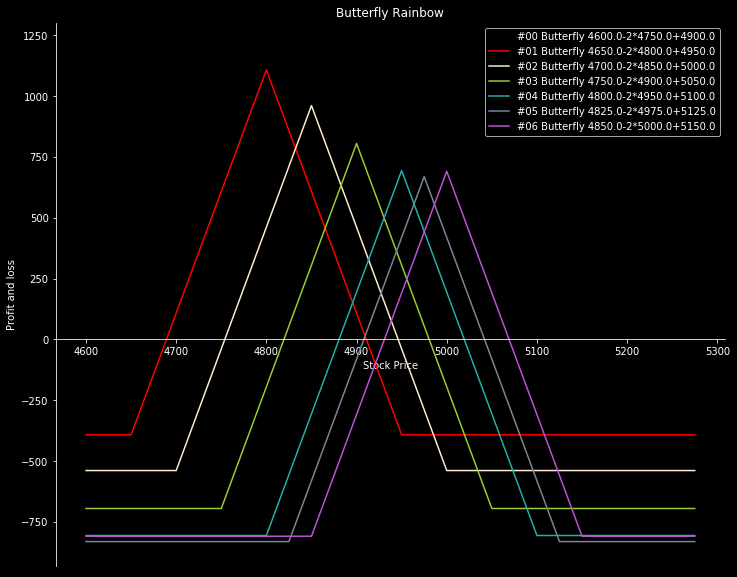

In [16]:
bfs = Butterfly.explorator(call.values(), step=150)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')

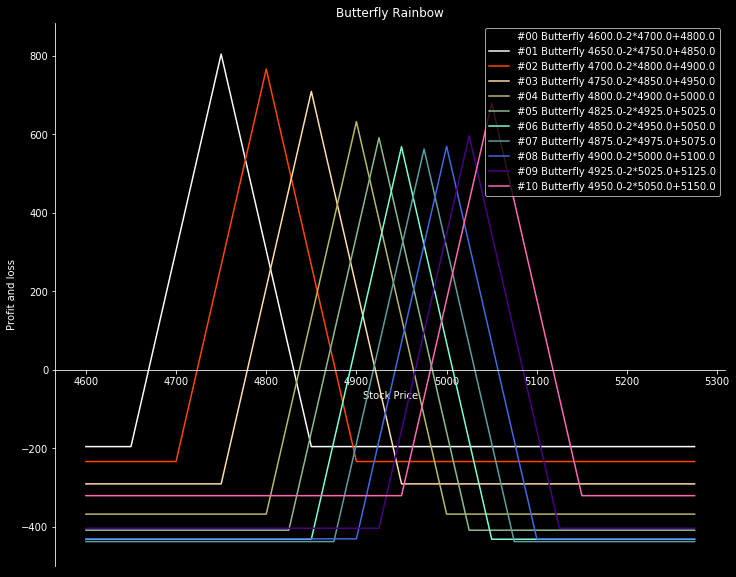

In [18]:
bfs = Butterfly.explorator(call.values(), step=100)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')